# Stable Diffusion Pipeline Testing

This notebook will be used in order to have our first impressions about the performance of Stable Diffusion, which we will finetune later.

In [2]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from PIL import Image

In [7]:
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, use_auth_token=True)
pipe = pipe.to(device)

Fetching 19 files:   0%|                                                                        | 0/19 [00:00<?, ?it/s]

Downloading: 100%|████████████████████████████████████████████████████████████████| 1.34k/1.34k [00:00<00:00, 1.34MB/s]
Fetching 19 files:   5%|███▎                                                            | 1/19 [00:01<00:21,  1.19s/it]

Downloading: 100%|████████████████████████████████████████████████████████████████| 14.9k/14.9k [00:00<00:00, 7.46MB/s]
Fetching 19 files:  11%|██████▋                                                         | 2/19 [00:02<00:21,  1.25s/it]
Downloading:  13%|████████▍                                                        | 31.8M/246M [00:13<00:08, 26.4MB/s]

Fetching 19 files:  16%|██████████                                                      | 3/19 [00:03<00:19,  1.20s/it]

Fetching 19 files:  21%|█████████████▍                                                  | 4/19 [00:04<00:18,  1.22s/it]

Downloading: 100%|█████████████████

Downloading:  15%|██████████                                                       | 188M/1.22G [00:05<00:30, 33.4MB/s]

Downloading:  16%|██████████▎                                                      | 193M/1.22G [00:05<00:28, 35.3MB/s]

Downloading:  16%|██████████▌                                                      | 196M/1.22G [00:05<00:28, 36.2MB/s]

Downloading:  16%|██████████▋                                                      | 201M/1.22G [00:05<00:27, 37.1MB/s]

Downloading:  17%|██████████▉                                                      | 204M/1.22G [00:06<00:28, 35.1MB/s]

Downloading:  17%|███████████▏                                                     | 209M/1.22G [00:06<00:26, 37.3MB/s]

Downloading:  17%|███████████▎                                                     | 213M/1.22G [00:06<00:27, 36.2MB/s]

Downloading:  18%|███████████▌                                                     | 216M/1.22G [00:06<00:29, 34.4MB/s]

Downloading:  18%|███████████▊  

Downloading:  35%|██████████████████████▌                                          | 422M/1.22G [00:12<00:25, 31.1MB/s]

Downloading:  35%|██████████████████████▋                                          | 425M/1.22G [00:12<00:25, 30.9MB/s]

Downloading:  35%|██████████████████████▊                                          | 428M/1.22G [00:12<00:25, 30.9MB/s]

Downloading:  35%|███████████████████████                                          | 431M/1.22G [00:13<00:24, 32.4MB/s]

Downloading:  36%|███████████████████████▎                                         | 435M/1.22G [00:13<00:23, 33.6MB/s]

Downloading:  36%|███████████████████████▍                                         | 439M/1.22G [00:13<00:22, 34.9MB/s]

Downloading:  36%|███████████████████████▋                                         | 443M/1.22G [00:13<00:22, 35.0MB/s]

Downloading:  37%|███████████████████████▉                                         | 447M/1.22G [00:13<00:20, 36.9MB/s]

Downloading:  37%|██████████████

Downloading:  56%|████████████████████████████████████▌                            | 684M/1.22G [00:19<00:11, 47.5MB/s]

Downloading:  57%|████████████████████████████████████▊                            | 688M/1.22G [00:19<00:11, 47.4MB/s]

Downloading:  57%|█████████████████████████████████████                            | 694M/1.22G [00:19<00:10, 48.8MB/s]

Downloading:  57%|█████████████████████████████████████▎                           | 698M/1.22G [00:19<00:10, 47.9MB/s]

Downloading:  58%|█████████████████████████████████████▌                           | 703M/1.22G [00:20<00:12, 40.1MB/s]

Downloading:  58%|█████████████████████████████████████▊                           | 708M/1.22G [00:20<00:12, 40.7MB/s]

Downloading:  59%|██████████████████████████████████████                           | 712M/1.22G [00:20<00:11, 42.6MB/s]

Downloading:  59%|██████████████████████████████████████▎                          | 717M/1.22G [00:20<00:17, 28.0MB/s]

Downloading:  59%|██████████████

Downloading:  81%|████████████████████████████████████████████████████▎            | 979M/1.22G [00:26<00:05, 40.3MB/s]

Downloading:  81%|████████████████████████████████████████████████████▌            | 983M/1.22G [00:26<00:05, 40.0MB/s]

Downloading:  81%|████████████████████████████████████████████████████▊            | 988M/1.22G [00:26<00:05, 42.4MB/s]

Downloading:  82%|█████████████████████████████████████████████████████            | 993M/1.22G [00:26<00:05, 44.3MB/s]

Downloading:  82%|█████████████████████████████████████████████████████▎           | 998M/1.22G [00:26<00:04, 43.9MB/s]

Downloading:  82%|████████████████████████████████████████████████████▊           | 1.00G/1.22G [00:27<00:04, 44.4MB/s]

Downloading:  83%|█████████████████████████████████████████████████████           | 1.01G/1.22G [00:27<00:04, 45.1MB/s]

Downloading:  83%|█████████████████████████████████████████████████████▏          | 1.01G/1.22G [00:27<00:04, 43.6MB/s]

Downloading:  84%|██████████████

Downloading:   6%|███▊                                                             | 29.3M/492M [00:00<00:11, 39.0MB/s]

Downloading:   7%|████▍                                                            | 33.5M/492M [00:00<00:11, 39.6MB/s]

Downloading:   8%|████▉                                                            | 37.4M/492M [00:01<00:13, 35.0MB/s]

Downloading:   8%|█████▍                                                           | 41.0M/492M [00:01<00:14, 30.7MB/s]

Downloading:   9%|█████▉                                                           | 44.8M/492M [00:01<00:14, 31.0MB/s]

Downloading:  10%|██████▎                                                          | 48.0M/492M [00:01<00:14, 29.7MB/s]

Downloading:  10%|██████▋                                                          | 51.0M/492M [00:01<00:15, 28.4MB/s]

Downloading:  11%|███████▎                                                         | 55.2M/492M [00:01<00:13, 31.8MB/s]

Downloading:  12%|███████▊      

Downloading:  60%|███████████████████████████████████████▎                          | 293M/492M [00:07<00:04, 43.5MB/s]

Downloading:  60%|███████████████████████████████████████▊                          | 297M/492M [00:08<00:04, 42.9MB/s]

Downloading:  61%|████████████████████████████████████████▍                         | 302M/492M [00:08<00:04, 41.1MB/s]

Downloading:  62%|█████████████████████████████████████████                         | 307M/492M [00:08<00:04, 43.0MB/s]

Downloading:  63%|█████████████████████████████████████████▊                        | 312M/492M [00:08<00:03, 46.5MB/s]

Downloading:  65%|██████████████████████████████████████████▋                       | 318M/492M [00:08<00:03, 50.2MB/s]

Downloading:  66%|███████████████████████████████████████████▎                      | 323M/492M [00:08<00:03, 49.7MB/s]

Downloading:  67%|████████████████████████████████████████████                      | 328M/492M [00:08<00:04, 39.8MB/s]

Downloading:  68%|██████████████

Downloading:   1%|▎                                                               | 18.4M/3.44G [00:00<01:31, 37.4MB/s]

Downloading:   1%|▍                                                               | 24.0M/3.44G [00:00<01:19, 43.2MB/s]

Downloading:   1%|▌                                                               | 29.8M/3.44G [00:00<01:11, 48.0MB/s]

Downloading:   1%|▋                                                               | 35.9M/3.44G [00:00<01:05, 52.0MB/s]

Downloading:   1%|▊                                                               | 41.3M/3.44G [00:00<01:04, 52.7MB/s]

Downloading:   1%|▊                                                               | 46.9M/3.44G [00:01<01:03, 53.6MB/s]

Downloading:   2%|▉                                                               | 52.6M/3.44G [00:01<01:03, 53.7MB/s]

Downloading:   2%|█                                                               | 58.0M/3.44G [00:01<01:19, 42.8MB/s]

Downloading:   2%|█▏            

Downloading:  12%|███████▌                                                         | 399M/3.44G [00:07<00:54, 56.0MB/s]

Downloading:  12%|███████▋                                                         | 405M/3.44G [00:07<00:54, 55.7MB/s]

Downloading:  12%|███████▊                                                         | 412M/3.44G [00:07<00:52, 57.9MB/s]

Downloading:  12%|███████▉                                                         | 418M/3.44G [00:07<00:50, 59.7MB/s]

Downloading:  12%|████████                                                         | 424M/3.44G [00:07<00:51, 58.7MB/s]

Downloading:  13%|████████▏                                                        | 430M/3.44G [00:07<00:52, 57.2MB/s]

Downloading:  13%|████████▏                                                        | 436M/3.44G [00:08<01:04, 46.5MB/s]

Downloading:  13%|████████▎                                                        | 441M/3.44G [00:08<01:04, 46.7MB/s]

Downloading:  13%|████████▍     

Downloading:  22%|██████████████▍                                                  | 765M/3.44G [00:14<00:49, 54.5MB/s]

Downloading:  22%|██████████████▌                                                  | 771M/3.44G [00:14<00:48, 54.8MB/s]

Downloading:  23%|██████████████▋                                                  | 777M/3.44G [00:14<00:48, 55.3MB/s]

Downloading:  23%|██████████████▊                                                  | 782M/3.44G [00:14<00:47, 55.8MB/s]

Downloading:  23%|██████████████▉                                                  | 788M/3.44G [00:14<00:49, 53.2MB/s]

Downloading:  23%|██████████████▉                                                  | 793M/3.44G [00:14<00:49, 53.5MB/s]

Downloading:  23%|███████████████                                                  | 799M/3.44G [00:15<00:48, 54.5MB/s]

Downloading:  23%|███████████████▏                                                 | 805M/3.44G [00:15<00:52, 50.5MB/s]

Downloading:  24%|██████████████

Downloading:  33%|█████████████████████                                           | 1.13G/3.44G [00:21<00:44, 51.8MB/s]

Downloading:  33%|█████████████████████▏                                          | 1.14G/3.44G [00:21<00:43, 53.0MB/s]

Downloading:  33%|█████████████████████▎                                          | 1.14G/3.44G [00:21<00:41, 55.1MB/s]

Downloading:  33%|█████████████████████▍                                          | 1.15G/3.44G [00:21<00:40, 56.8MB/s]

Downloading:  34%|█████████████████████▌                                          | 1.16G/3.44G [00:21<00:39, 58.0MB/s]

Downloading:  34%|█████████████████████▌                                          | 1.16G/3.44G [00:21<00:38, 59.7MB/s]

Downloading:  34%|█████████████████████▋                                          | 1.17G/3.44G [00:22<00:39, 57.6MB/s]

Downloading:  34%|█████████████████████▊                                          | 1.17G/3.44G [00:22<00:38, 58.4MB/s]

Downloading:  34%|██████████████

Downloading:  44%|███████████████████████████▉                                    | 1.50G/3.44G [00:28<01:03, 30.7MB/s]

Downloading:  44%|███████████████████████████▉                                    | 1.50G/3.44G [00:29<01:30, 21.4MB/s]

Downloading:  44%|████████████████████████████                                    | 1.51G/3.44G [00:29<01:40, 19.2MB/s]

Downloading:  44%|████████████████████████████                                    | 1.51G/3.44G [00:29<01:34, 20.5MB/s]

Downloading:  44%|████████████████████████████▏                                   | 1.51G/3.44G [00:29<01:26, 22.4MB/s]

Downloading:  44%|████████████████████████████▏                                   | 1.51G/3.44G [00:29<01:18, 24.4MB/s]

Downloading:  44%|████████████████████████████▎                                   | 1.52G/3.44G [00:29<01:10, 27.2MB/s]

Downloading:  44%|████████████████████████████▎                                   | 1.52G/3.44G [00:29<01:02, 30.8MB/s]

Downloading:  44%|██████████████

Downloading:  51%|████████████████████████████████▋                               | 1.76G/3.44G [00:36<00:59, 28.4MB/s]

Downloading:  51%|████████████████████████████████▊                               | 1.76G/3.44G [00:36<00:57, 29.3MB/s]

Downloading:  51%|████████████████████████████████▊                               | 1.76G/3.44G [00:36<00:57, 29.0MB/s]

Downloading:  51%|████████████████████████████████▊                               | 1.77G/3.44G [00:37<00:59, 28.0MB/s]

Downloading:  51%|████████████████████████████████▉                               | 1.77G/3.44G [00:37<00:58, 28.3MB/s]

Downloading:  52%|█████████████████████████████████                               | 1.77G/3.44G [00:37<00:57, 29.1MB/s]

Downloading:  52%|█████████████████████████████████                               | 1.78G/3.44G [00:37<00:55, 30.1MB/s]

Downloading:  52%|█████████████████████████████████▏                              | 1.78G/3.44G [00:37<00:53, 31.1MB/s]

Downloading:  52%|██████████████

Downloading:  61%|██████████████████████████████████████▉                         | 2.09G/3.44G [00:43<00:22, 59.2MB/s]

Downloading:  61%|███████████████████████████████████████                         | 2.10G/3.44G [00:43<00:23, 57.4MB/s]

Downloading:  61%|███████████████████████████████████████▏                        | 2.10G/3.44G [00:43<00:24, 55.5MB/s]

Downloading:  61%|███████████████████████████████████████▏                        | 2.11G/3.44G [00:44<00:24, 55.2MB/s]

Downloading:  61%|███████████████████████████████████████▎                        | 2.11G/3.44G [00:44<00:24, 54.3MB/s]

Downloading:  62%|███████████████████████████████████████▍                        | 2.12G/3.44G [00:44<00:24, 53.7MB/s]

Downloading:  62%|███████████████████████████████████████▌                        | 2.12G/3.44G [00:44<00:24, 53.0MB/s]

Downloading:  62%|███████████████████████████████████████▋                        | 2.13G/3.44G [00:44<00:26, 49.9MB/s]

Downloading:  62%|██████████████

Downloading:  71%|█████████████████████████████████████████████▋                  | 2.46G/3.44G [00:50<00:17, 55.7MB/s]

Downloading:  72%|█████████████████████████████████████████████▊                  | 2.46G/3.44G [00:50<00:17, 55.0MB/s]

Downloading:  72%|█████████████████████████████████████████████▉                  | 2.47G/3.44G [00:50<00:17, 54.5MB/s]

Downloading:  72%|██████████████████████████████████████████████                  | 2.47G/3.44G [00:50<00:23, 40.4MB/s]

Downloading:  72%|██████████████████████████████████████████████▏                 | 2.48G/3.44G [00:51<00:22, 42.3MB/s]

Downloading:  72%|██████████████████████████████████████████████▏                 | 2.48G/3.44G [00:51<00:22, 43.3MB/s]

Downloading:  72%|██████████████████████████████████████████████▎                 | 2.49G/3.44G [00:51<00:21, 44.5MB/s]

Downloading:  73%|██████████████████████████████████████████████▍                 | 2.49G/3.44G [00:51<00:20, 45.9MB/s]

Downloading:  73%|██████████████

Downloading:  81%|████████████████████████████████████████████████████            | 2.80G/3.44G [00:57<00:13, 46.3MB/s]

Downloading:  82%|████████████████████████████████████████████████████▏           | 2.80G/3.44G [00:57<00:14, 44.3MB/s]

Downloading:  82%|████████████████████████████████████████████████████▎           | 2.81G/3.44G [00:57<00:15, 40.3MB/s]

Downloading:  82%|████████████████████████████████████████████████████▎           | 2.81G/3.44G [00:58<00:15, 41.5MB/s]

Downloading:  82%|████████████████████████████████████████████████████▍           | 2.82G/3.44G [00:58<00:15, 40.7MB/s]

Downloading:  82%|████████████████████████████████████████████████████▌           | 2.82G/3.44G [00:58<00:15, 40.0MB/s]

Downloading:  82%|████████████████████████████████████████████████████▌           | 2.83G/3.44G [00:58<00:14, 41.4MB/s]

Downloading:  82%|████████████████████████████████████████████████████▋           | 2.83G/3.44G [00:58<00:15, 40.0MB/s]

Downloading:  82%|██████████████

Downloading:  89%|████████████████████████████████████████████████████████▋       | 3.04G/3.44G [01:04<00:09, 40.2MB/s]

Downloading:  89%|████████████████████████████████████████████████████████▊       | 3.05G/3.44G [01:05<00:09, 42.4MB/s]

Downloading:  89%|████████████████████████████████████████████████████████▊       | 3.05G/3.44G [01:05<00:09, 39.2MB/s]

Downloading:  89%|████████████████████████████████████████████████████████▉       | 3.06G/3.44G [01:05<00:08, 42.6MB/s]

Downloading:  89%|█████████████████████████████████████████████████████████       | 3.06G/3.44G [01:05<00:08, 44.8MB/s]

Downloading:  89%|█████████████████████████████████████████████████████████▏      | 3.07G/3.44G [01:05<00:08, 45.0MB/s]

Downloading:  89%|█████████████████████████████████████████████████████████▏      | 3.07G/3.44G [01:05<00:09, 40.0MB/s]

Downloading:  90%|█████████████████████████████████████████████████████████▎      | 3.08G/3.44G [01:05<00:09, 40.0MB/s]

Downloading:  90%|██████████████

Downloading:  96%|█████████████████████████████████████████████████████████████▎  | 3.30G/3.44G [01:12<00:06, 21.7MB/s]

Downloading:  96%|█████████████████████████████████████████████████████████████▍  | 3.30G/3.44G [01:12<00:05, 23.8MB/s]

Downloading:  96%|█████████████████████████████████████████████████████████████▍  | 3.30G/3.44G [01:12<00:05, 26.5MB/s]

Downloading:  96%|█████████████████████████████████████████████████████████████▌  | 3.31G/3.44G [01:12<00:04, 27.8MB/s]

Downloading:  96%|█████████████████████████████████████████████████████████████▌  | 3.31G/3.44G [01:12<00:04, 31.1MB/s]

Downloading:  96%|█████████████████████████████████████████████████████████████▋  | 3.32G/3.44G [01:12<00:03, 35.4MB/s]

Downloading:  97%|█████████████████████████████████████████████████████████████▊  | 3.32G/3.44G [01:12<00:03, 37.9MB/s]

Downloading:  97%|█████████████████████████████████████████████████████████████▊  | 3.32G/3.44G [01:12<00:03, 36.9MB/s]

Downloading:  97%|██████████████

Downloading:  19%|████████████                                                     | 62.4M/335M [00:01<00:08, 33.2MB/s]

Downloading:  20%|████████████▉                                                    | 66.7M/335M [00:02<00:07, 36.1MB/s]

Downloading:  21%|█████████████▉                                                   | 71.6M/335M [00:02<00:06, 39.5MB/s]

Downloading:  23%|██████████████▉                                                  | 77.2M/335M [00:02<00:05, 43.7MB/s]

Downloading:  25%|████████████████                                                 | 82.6M/335M [00:02<00:05, 43.0MB/s]

Downloading:  26%|█████████████████                                                | 88.1M/335M [00:02<00:05, 46.4MB/s]

Downloading:  28%|██████████████████                                               | 92.8M/335M [00:02<00:05, 44.6MB/s]

Downloading:  29%|██████████████████▉                                              | 97.3M/335M [00:02<00:05, 44.4MB/s]

Downloading:  30%|██████████████

In [114]:
prompt = "deep space as digital art"
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5).images[0]  
    
image.save("image.png")

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:08<00:00,  6.06it/s]


In [115]:
img = Image.open("image.png")

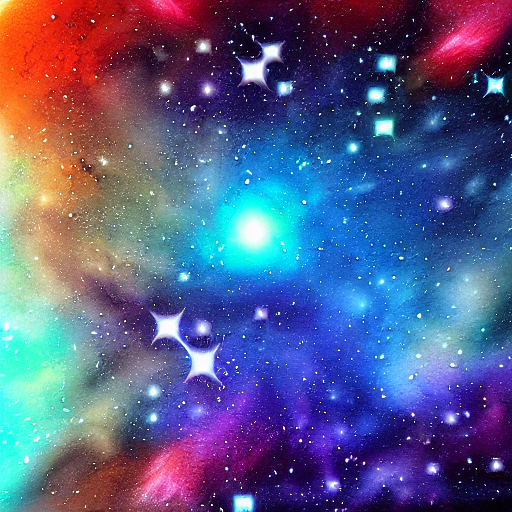

In [116]:
display(image)